Pikachu Unsorted[12.08810960061184, 6.704642780751213, 4.537268592275223, 5.205574623435524, 3.9861946561561314, 2.350982579235108, 6.594038167893765, 6.147288121451508, 2.7774602418664545, 4.961313174483597, 3.581306127508017, 7.38712121176605, 2.495479271074257, 10.274288260613513, 9.461074128248242, 3.5183132681387344, 4.165558054439693, 6.722986051928506, 2.1643439869758314, 5.332678751295461, 9.599049261963247, 5.734738588155114, 5.275781015724256, 7.871908898394122, 10.682186512512587, 3.646708854585231, 6.835355953936654, 5.982995489902438, 5.5232705408141225, 5.53999302486695, 8.006880624394544, 9.224625746969595, 10.457639646039743, 4.473008965670769, 7.202573687740281, 3.588470028882261, 10.597644387240534, 3.2723214424911253, 2.900706894805602, 7.066073485925798, 4.413571466334312, 2.8143615295614413, 4.563719410843215, 9.86292355175955, 4.830310024667866, 9.698956160764565, 5.528566822879103, 1.8304663206363925, 10.994983336132812, 8.973178368041872]
Pikachu sorted[1.830466

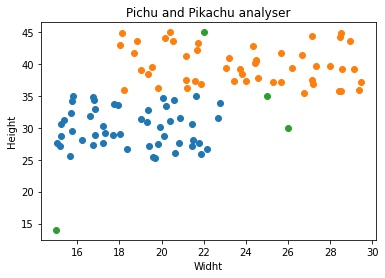

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import math

pichuFiles = "files/pichu.txt"
pikachuFiles = "files/pikachu.txt"
testPointsFiles = "files/test_points.txt"

testlistIndex = 0
pichuIndex = 0
pikachuIndex = 0
identifiedPichuPoint = []
identifiedPikachuPoint = []

pichuWidht = []
pichuHeight = []
pikachuWidht = []
pikachuHeight = []
testPointsList = []
testPointsWidth = []
testPointsHeight = []

with open(pichuFiles, "r") as pichu, open(pikachuFiles, "r") as pikachu:    ## Opens the files as a variable for easy use
    for i, pichuData in enumerate(pichu.readlines()):     ## Creats a for loop that reads the data from a specifc file line by line.
        if i == 0:  ## Skips the first line so that it does not get read
            continue

        pichuData = pichuData.replace("(", "")  ## Removes ( from the string
        pichuData = pichuData.replace(")", "")  ## - || -  ) -     ||     -
        pichuData = pichuData.replace("\n", "") ## Removes newlines

        widht, height = pichuData.split(",")    # Splits the data into two diffrent points

        pichuWidht.append(widht)
        pichuHeight.append(height)
    
    for i, pikachuData in enumerate(pikachu.readlines()):
        if i == 0:
            continue

        pikachuData = pikachuData.replace("(", "")
        pikachuData = pikachuData.replace(")", "")
        pikachuData = pikachuData.replace("\n", "")

        widht, height = pikachuData.split(",")

        pikachuWidht.append(widht)
        pikachuHeight.append(height)

with open(testPointsFiles, "r") as testPoint:
    testPoints = testPoint.readline()
    testPoints = testPoints.replace("(", "")
    testPoints = testPoints.replace(" ", "")
    testPoints = testPoints.replace(")", "")
    testPointsList = testPoints.split(",")

testPointsList = [float(i) for i in testPointsList]
        
for i in testPointsList:
    if testlistIndex % 2 == 0:
        testPointsWidth.append(testPointsList[testlistIndex])
        testlistIndex += 1
    elif testlistIndex % 2 != 0:
        testPointsHeight.append(testPointsList[testlistIndex])
        testlistIndex += 1

pichuWidht = [float(i) for i in pichuWidht]     ##Converts all strings in the list to floats
pichuHeight = [float(i) for i in pichuHeight]

pikachuWidht = [float(i) for i in pikachuWidht]
pikachuHeight = [float(i) for i in pikachuHeight]

pichuWidhtPoints = np.array(pichuWidht)     ## Creats an array out of the list pichuWidht 
pichuHeightPoints = np.array(pichuHeight)   ## Information and cod taken from -> https://www.codespeedy.com/how-to-plot-points-in-matplotlib-with-python/

pikachuWidhtPoints = np.array(pikachuWidht)
pikachuHeightPoints = np.array(pikachuHeight)

testWidht = np.array(testPointsWidth)
testHeight = np.array(testPointsHeight)

for i in pikachuWidht:
    identifiedpoint = math.sqrt(((pikachuWidht[pikachuIndex] - testPointsWidth[0])**2) + ((pikachuHeight[pikachuIndex] - testPointsHeight[0])**2))
    pikachuIndex += 1
    identifiedPikachuPoint.append(identifiedpoint)

for i in pichuWidht:
    identifiedpointpichu = math.sqrt(((pichuWidht[pichuIndex] - testPointsWidth[0])**2) + ((pichuHeight[pichuIndex] - testPointsHeight[0])**2))
    pichuIndex += 1
    identifiedPichuPoint.append(identifiedpointpichu)
    

print(f"Pikachu Unsorted{identifiedPikachuPoint}")
identifiedPikachuPoint.sort()
print(f"Pikachu sorted{identifiedPikachuPoint}")

print(f"Pichu Unsorted{identifiedPichuPoint}")
identifiedPichuPoint.sort()
print(f"Pichu sorted{identifiedPichuPoint}")

if identifiedPichuPoint[0] < identifiedPikachuPoint[0]:
    print(f"{testWidht[0], testHeight[0]} is a Pichu")
elif identifiedPichuPoint[0] > identifiedPikachuPoint[0]:
    print(f"{testWidht[0], testHeight[0]} is a Pikachu")

plt.scatter(pichuWidhtPoints, pichuHeightPoints)
plt.scatter(pikachuWidhtPoints, pikachuHeightPoints)
plt.scatter(testWidht, testHeight)
plt.xlabel("Widht")
plt.ylabel("Height")
plt.title("Pichu and Pikachu analyser")
plt.show()